

> Петров Евгений, БД-231м

# **Лабораторная работа 4. Аналитика данных в Polymatica Analytics**

# **Вариант 23**. Прогнозирование продаж на 2024 год

**Цель работы:** используя исторические данные по продажам за 2022 и 2023 годы,
выполнить прогнозирование продаж на 2024 год с помощью статистических
методов в Polymatica Analytics.


**Датасет:** Car Sales [2022-2023] https://www.kaggle.com/datasets/missionjee/car-sales-report/data



1. Car id - уникальный идентификатор для каждого автомобиля в наборе данных.
2. Date - Дата совершения сделки по продаже автомобиля.
3. Customer Name - Имя клиента, приобретающего автомобиль. .
4. Gender - Пол клиента (например, мужчина, женщина)
5. Annual Income - годовой доход клиента
6. Dealer_Name - Название автодилера, связанного с продажей.
7. Company - Компания или марка автомобиля.
8. Model - Модель автомобиля
9. Engine - Двигатель.
10. Transmission - тип коробки передач.
11.Color - Цвет.
12. Price ($) -Цена.
13. Dealer_No - Идентификационный номер дилера, связанный с продажей.
14. Body style - Кузов.
15. Phone - Номер телефона.
16. Dealer_Region - Регион нахождения дилера.

# 1.Загрузка данных и предобработка:




In [2]:
import pandas as pd

file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

In [3]:
car_data


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [6]:

# Шаг 2: Удаление столбцов
columns_to_remove = ['Customer Name', 'Annual Income', 'Engine','Dealer_No ','Phone']
car_data_cleaned = car_data.drop(columns=columns_to_remove)

# Шаг 3: Сохранение изменений в новый файл
car_data_cleaned.to_csv('car_data_new.csv', index=False)

print("Обработка завершена.")

Обработка завершена.


In [41]:
file_path = 'car_data_new.csv'
car_data_new = pd.read_csv(file_path)

In [42]:
car_data_new

,Car_id,Date,Gender,Dealer_Name,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region
0,C_CND_000001,1/2/2022,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,1/2/2022,Male,C & M Motors Inc,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,1/2/2022,Male,Capitol KIA,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,1/2/2022,Male,Chrysler of Tri-Cities,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,1/2/2022,Male,Chrysler Plymouth,Acura,TL,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Male,C & M Motors Inc,Plymouth,Voyager,Manual,Red,12000,Passenger,Pasco
23902,C_CND_023903,12/31/2023,Female,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Auto,Black,16000,Hardtop,Middletown
23903,C_CND_023904,12/31/2023,Male,Chrysler of Tri-Cities,BMW,328i,Manual,Red,21000,Sedan,Scottsdale
23904,C_CND_023905,12/31/2023,Male,Chrysler Plymouth,Chevrolet,Metro,Auto,Black,31000,Passenger,Austin


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Просмотр первых строк
data.head()



,Car_id,Date,Gender,Dealer_Name,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region,Year
0,C_CND_000001,2022-01-02,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Auto,Black,26000,SUV,Middletown,2022
1,C_CND_000002,2022-01-02,Male,C & M Motors Inc,Dodge,Durango,Auto,Black,19000,SUV,Aurora,2022
2,C_CND_000003,2022-01-02,Male,Capitol KIA,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville,2022
3,C_CND_000004,2022-01-02,Male,Chrysler of Tri-Cities,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco,2022
4,C_CND_000005,2022-01-02,Male,Chrysler Plymouth,Acura,TL,Auto,Red,24500,Hatchback,Janesville,2022


In [44]:
# Проверка информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Gender         23906 non-null  object        
 3   Dealer_Name    23906 non-null  object        
 4   Company        23906 non-null  object        
 5   Model          23906 non-null  object        
 6   Transmission   23906 non-null  object        
 7   Color          23906 non-null  object        
 8   Price ($)      23906 non-null  int64         
 9   Body Style     23906 non-null  object        
 10  Dealer_Region  23906 non-null  object        
 11  Year           23906 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 2.1+ MB


In [45]:
# Проверка на пропуски в данных
data.isnull().sum()

,0
Car_id,0
Date,0
Gender,0
Dealer_Name,0
Company,0
Model,0
Transmission,0
Color,0
Price ($),0
Body Style,0


In [46]:
# Основные статистические характеристики данных
data.describe()

,Date,Price ($),Year
count,23906,23906.000000,23906.000000
mean,2023-03-01 14:28:10.822387456,28090.247846,2022.554714
min,2022-01-02 00:00:00,1200.000000,2022.000000
25%,2022-09-20 00:00:00,18001.000000,2022.000000
50%,2023-03-13 00:00:00,23000.000000,2023.000000
75%,2023-09-08 00:00:00,34000.000000,2023.000000
max,2023-12-31 00:00:00,85800.000000,2023.000000
std,NaN,14788.687608,0.497008


In [47]:
# Удаление дубликатов
data.drop_duplicates(inplace=True)

# 2. Анализ данных:

<ipython-input-48-4cdb82447ce2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_year.index, y=sales_per_year.values, palette='viridis')


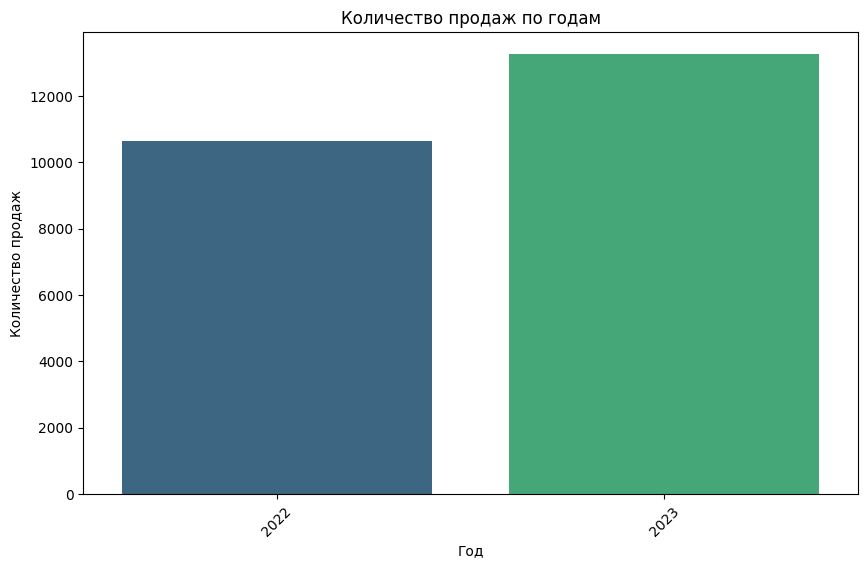

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
car_data = pd.read_csv('car_data.csv')

# Преобразуем колонку 'Date' в datetime формат и извлекаем год
car_data['Date'] = pd.to_datetime(car_data['Date'])
car_data['Year'] = car_data['Date'].dt.year

# 1. В каком году продаж было больше?
sales_per_year = car_data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_year.index, y=sales_per_year.values, palette='viridis')
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

> Эта диаграмма наглядно демонстрирует, в каком году было зафиксировано наибольшее количество продаж, позволяя сделать выводы о тенденциях на рынке автомобилей.



<ipython-input-49-573d4840b5eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')


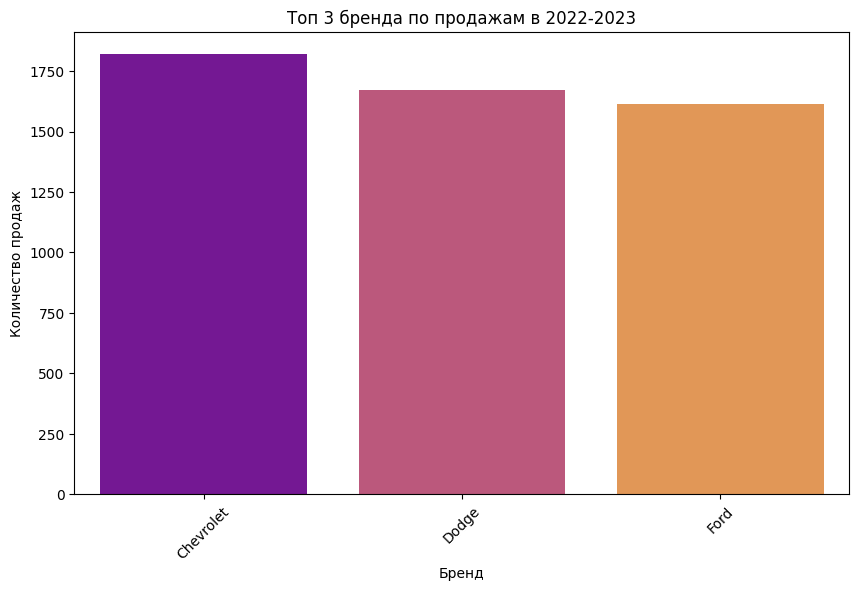

In [49]:
# 2. Топ 3 бренда по продажам в 2022-2023 году
top_brands = car_data[car_data['Year'].isin([2022, 2023])]['Company'].value_counts().head(3)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')
plt.title('Топ 3 бренда по продажам в 2022-2023')
plt.xlabel('Бренд')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()



> Здесь мы видим лучшие компании, что может помочь в понимании конкуренции и популярности брендов



<ipython-input-50-1485cef8049c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, palette='mako')


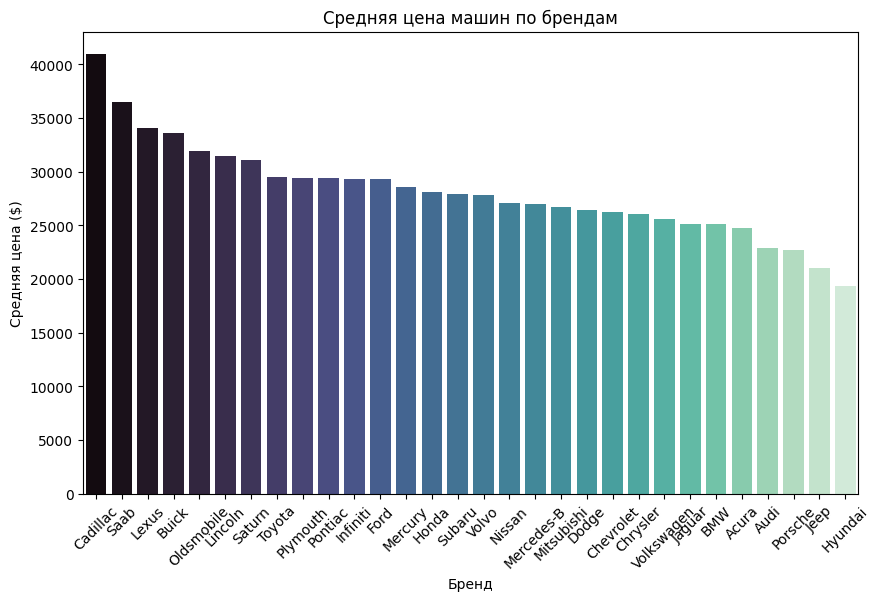

In [50]:
# 3. У какого бренда самые высокие цены на машины
avg_price_per_brand = car_data.groupby('Company')['Price ($)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, palette='mako')
plt.title('Средняя цена машин по брендам')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена ($)')
plt.xticks(rotation=45)
plt.show()



> Эта диаграмма показывает, у каких брендов самые высокие цены, что может коррелировать с их имиджем или качеством.



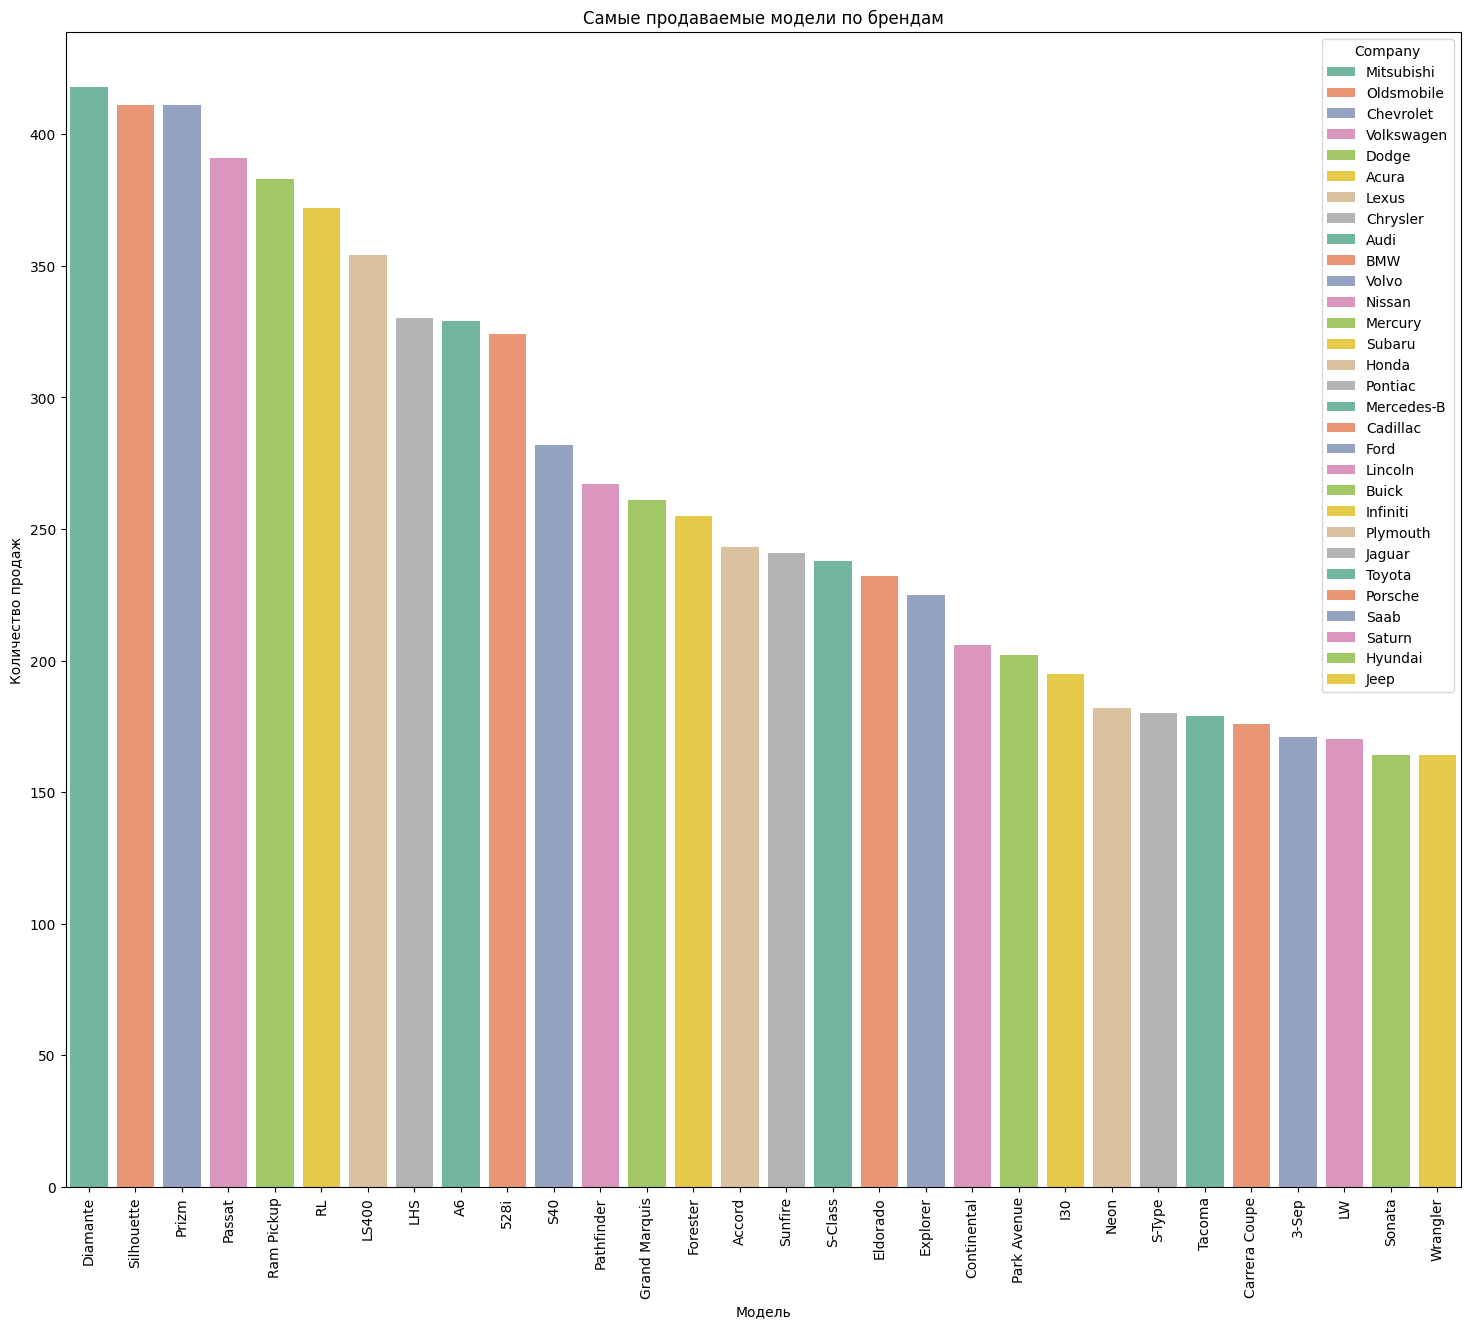

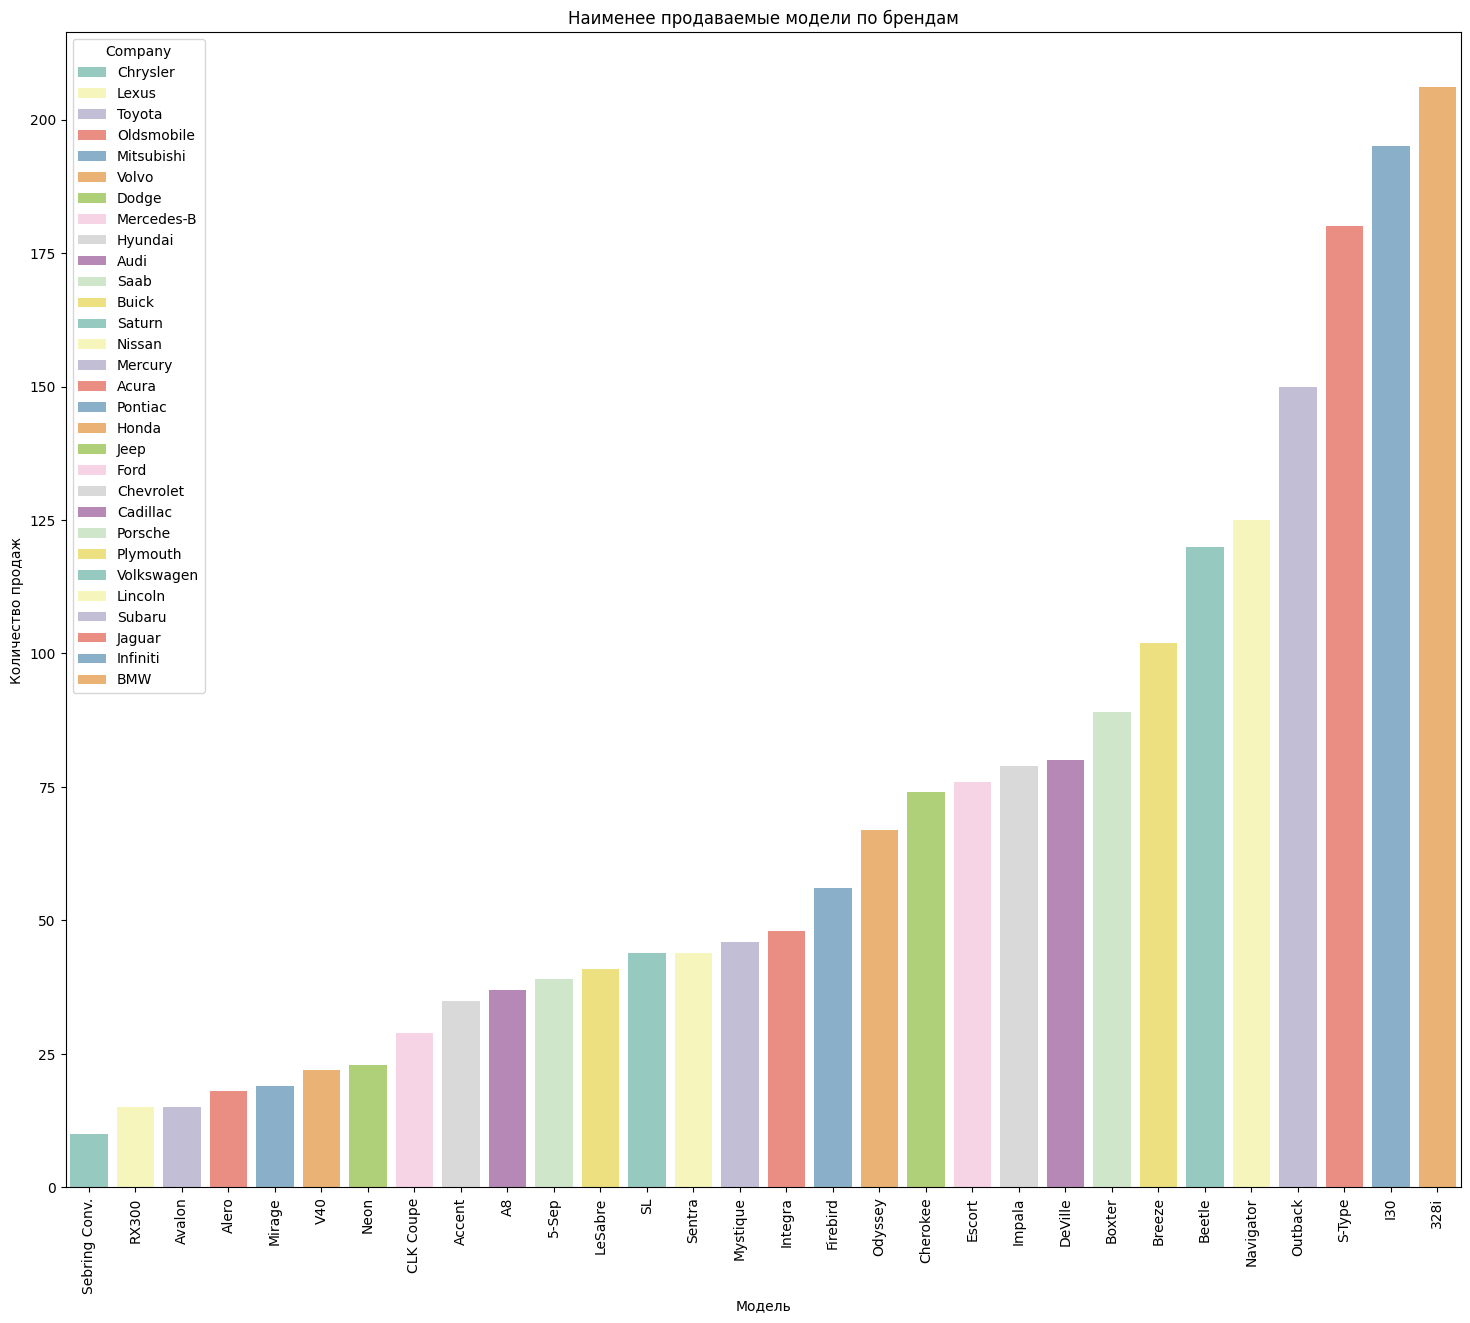

In [51]:
# 4. Какие модели машин в каждом бренде продаются больше всего и какие меньше всего
# Группируем данные по компаниям и моделям, и подсчитываем продажи
model_sales = car_data.groupby(['Company', 'Model']).size().reset_index(name='Sales')

# Находим наиболее продаваемые модели и сортируем в порядке убывания
top_model_sales = model_sales.loc[model_sales.groupby('Company')['Sales'].idxmax()]
top_model_sales = top_model_sales.sort_values(by='Sales', ascending=False)

# Находим наименее продаваемые модели и сортируем в порядке возрастания
bottom_model_sales = model_sales.loc[model_sales.groupby('Company')['Sales'].idxmin()]
bottom_model_sales = bottom_model_sales.sort_values(by='Sales', ascending=True)

# Столбчатая диаграмма для топовых моделей
plt.figure(figsize=(18, 15))
sns.barplot(data=top_model_sales, x='Model', y='Sales', hue='Company', palette='Set2')
plt.title('Самые продаваемые модели по брендам')
plt.xlabel('Модель')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)
plt.show()

# Столбчатая диаграмма для наименее продаваемых моделей
plt.figure(figsize=(18, 15))
sns.barplot(data=bottom_model_sales, x='Model', y='Sales', hue='Company', palette='Set3')
plt.title('Наименее продаваемые модели по брендам')
plt.xlabel('Модель')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)
plt.show()



> Эти две диаграммы дают представление о том, какие модели наиболее востребованы, а какие могут быть менее популярны.



<ipython-input-52-1048196a6866>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_region.index, y=sales_per_region.values, palette='cubehelix')


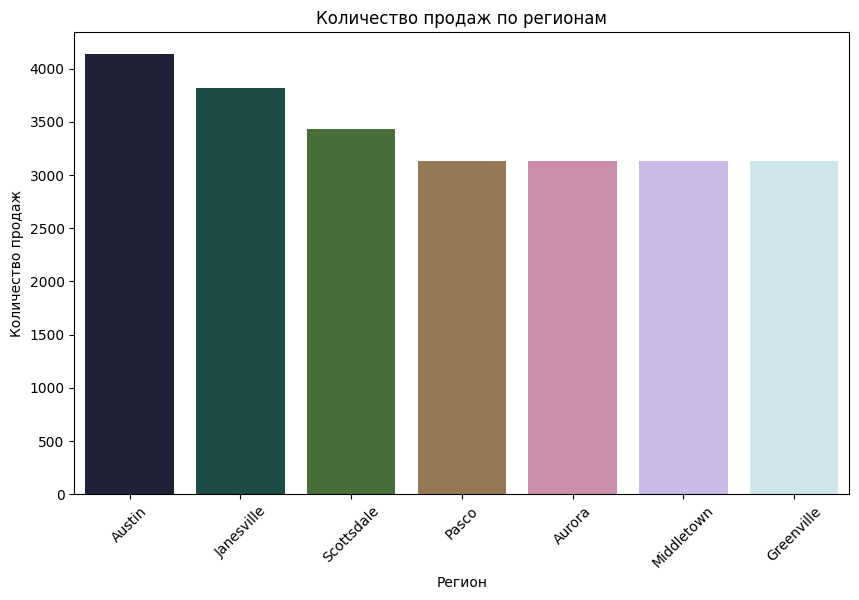

In [52]:
# 5. В каком регионе продаж больше?
sales_per_region = car_data['Dealer_Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_region.index, y=sales_per_region.values, palette='cubehelix')
plt.title('Количество продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()


> Анализ региональных продаж поможет понять, где находятся целевая аудитория и основные рынки, что важно для планирования маркетинга и продаж.


# 3. Решение задания 23. Прогнозирование продаж на 2024 год

In [60]:
import pandas as pd
from datetime import datetime

# Преобразуем столбец Date в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Добавляем столбец с годами для удобства
data['Year'] = data['Date'].dt.year

# Сгруппируем данные по годам и компаниям, сосчитаем количество продаж
sales_stats = data.groupby(['Year', 'Company']).count()['Car_id'].reset_index()
sales_stats.rename(columns={'Car_id': 'Sales'}, inplace=True)


In [61]:
sales_stats

,Year,Company,Sales
0,2022,Acura,313
1,2022,Audi,209
2,2022,BMW,345
3,2022,Buick,196
4,2022,Cadillac,289
5,2022,Chevrolet,776
6,2022,Chrysler,502
7,2022,Dodge,722
8,2022,Ford,728
9,2022,Honda,316


In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

sales_stats = pd.DataFrame(sales_data)

# Функция для прогнозирования продаж для каждой компании
def forecast_sales(df):
    predictions = []
    companies = df['Company'].unique()

    for company in companies:
        company_data = df[df['Company'] == company]
        X = company_data['Year'].values.reshape(-1, 1)  # Признаки (Год)
        y = company_data['Sales'].values  # Целевая переменная (Продажи)

        # Создаем и обучаем модель линейной регрессии
        model = LinearRegression()
        model.fit(X, y)

        # Прогнозируем на 2024 год
        future_year = np.array([[2024]])
        predicted_sales = model.predict(future_year)[0]
        predictions.append({'Year': 2024, 'Company': company, 'Sales': predicted_sales})

    return pd.DataFrame(predictions)

# Получаем прогнозы
forecast_df = forecast_sales(sales_stats)

# Объединяем с исходным DataFrame
sales_stats = pd.concat([sales_stats, forecast_df], ignore_index=True)

# Выводим итоговый DataFrame
sales_stats


,Year,Company,Sales
0,2022,Acura,313.0
1,2022,Audi,209.0
2,2022,BMW,345.0
3,2022,Buick,196.0
4,2022,Cadillac,289.0
...,...,...,...
85,2024,Saturn,392.0
86,2024,Subaru,285.0
87,2024,Toyota,669.0
88,2024,Volkswagen,821.0


In [70]:
import pandas as pd

pd.set_option('display.max_rows', None)  # None - отображать все строки
pd.set_option('display.max_columns', None)  # None - отображать все столбцы

sales_stats


,Year,Company,Sales
0,2022,Acura,313.0
1,2022,Audi,209.0
2,2022,BMW,345.0
3,2022,Buick,196.0
4,2022,Cadillac,289.0
5,2022,Chevrolet,776.0
6,2022,Chrysler,502.0
7,2022,Dodge,722.0
8,2022,Ford,728.0
9,2022,Honda,316.0


            Sales_2022  Sales_2023  Sales_2024  Growth_2024
Company                                                    
Acura              313         376         439           94
Audi               209         259         309           75
BMW                345         445         545          150
Buick              196         243         290           70
Cadillac           289         363         437          111
Chevrolet          776        1043        1310          400
Chrysler           502         618         734          174
Dodge              722         949        1176          340
Ford               728         886        1044          237
Honda              316         392         468          114
Hyundai            130         134         138            6
Infiniti            73         122         171           73
Jaguar              78         102         126           36
Jeep               163         200         237           55
Lexus              357         445      

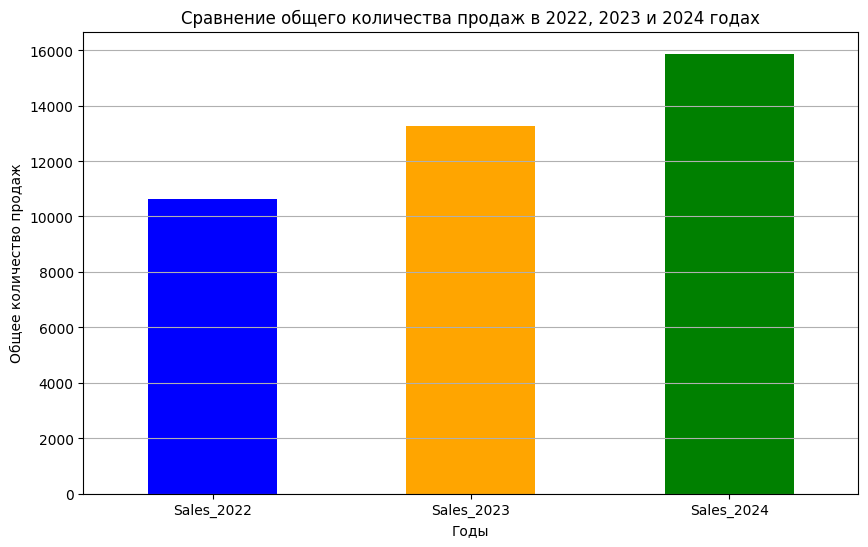

In [87]:

import pandas as pd
import matplotlib.pyplot as plt

# Ваш исходный код
sales_2022 = sales_stats[sales_stats['Year'] == 2022].set_index('Company')['Sales']
sales_2023 = sales_stats[sales_stats['Year'] == 2023].set_index('Company')['Sales']
sales_2024 = sales_stats[sales_stats['Year'] == 2024].set_index('Company')['Sales']

# Объединяем данные по компаниям
sales_comparison = pd.DataFrame({
    'Sales_2022': sales_2022,
    'Sales_2023': sales_2023,
    'Sales_2024': sales_2024
}).fillna(0)

# Преобразуем столбцы в целые числа
sales_comparison = sales_comparison.astype(int)

# Рассчитываем рост продаж в 2024 году по сравнению с 2022 и 2023
sales_comparison['Growth_2024'] = sales_comparison['Sales_2024'] - (sales_comparison['Sales_2022'] + sales_comparison['Sales_2023']) / 2

# Преобразуем столбец Growth_2024 в целое число
sales_comparison['Growth_2024'] = sales_comparison['Growth_2024'].astype(int)

# Выводим итоговые результаты по каждой компании
print(sales_comparison[['Sales_2022', 'Sales_2023', 'Sales_2024', 'Growth_2024']])

# Считаем суммарный рост продаж по всем компаниям
total_growth = sales_comparison['Growth_2024'].sum()
print(f"Суммарный рост продаж в 2024 году по сравнению с 2022 и 2023 годами: {total_growth}")

# Добавляем код для построения диаграммы
# Подсчитываем суммарные продажи по годам
total_sales = sales_comparison[['Sales_2022', 'Sales_2023', 'Sales_2024']].sum()

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
total_sales.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Сравнение общего количества продаж в 2022, 2023 и 2024 годах')
plt.xlabel('Годы')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Отображаем диаграмму
plt.show()


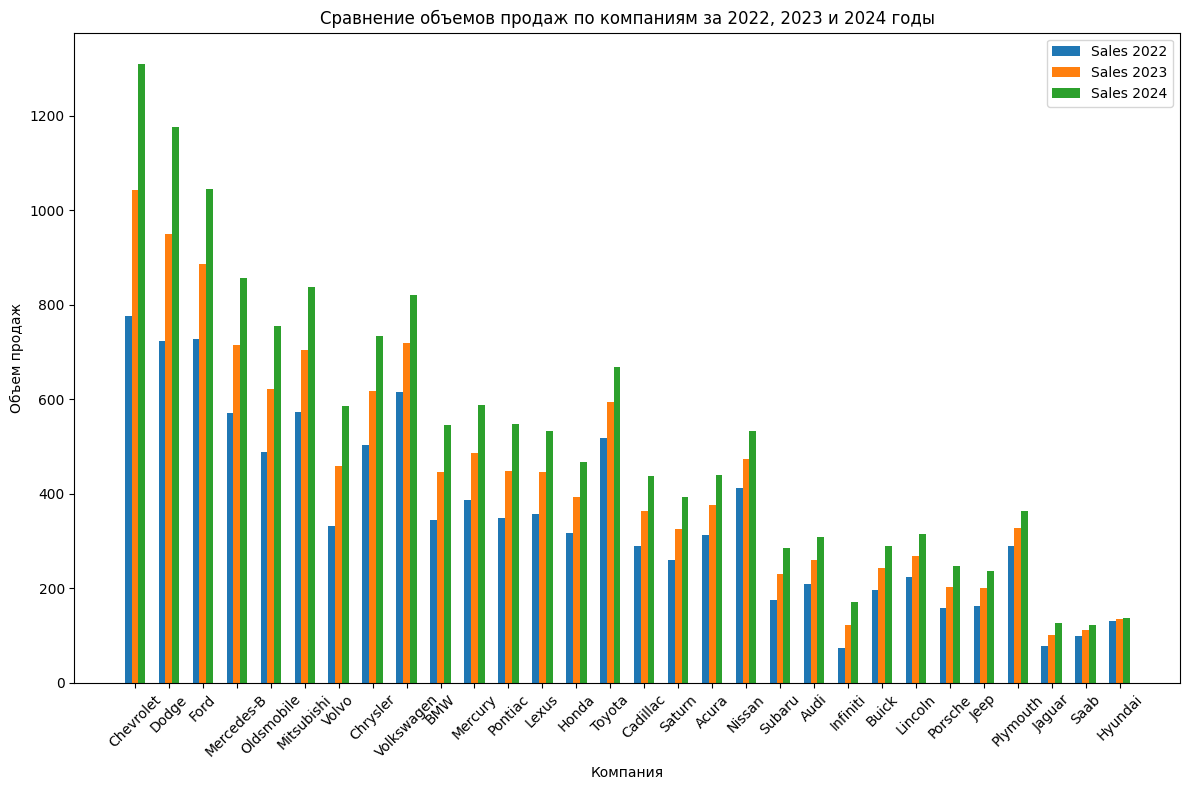

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Сортируем компании по росту в 2024 году
sales_comparison_sorted = sales_comparison.sort_values(by='Growth_2024', ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 8))

# Определяем количество позиций по оси Y
positions = range(len(sales_comparison_sorted))

# Столбцы для 2022, 2023 и 2024 годов
plt.bar(positions, sales_comparison_sorted['Sales_2022'], width=0.2, label='Sales 2022', align='center')
plt.bar([p + 0.2 for p in positions], sales_comparison_sorted['Sales_2023'], width=0.2, label='Sales 2023', align='center')
plt.bar([p + 0.4 for p in positions], sales_comparison_sorted['Sales_2024'], width=0.2, label='Sales 2024', align='center')

# Подписи для осей и заголовок
plt.xlabel('Компания')
plt.ylabel('Объем продаж')
plt.title('Сравнение объемов продаж по компаниям за 2022, 2023 и 2024 годы')
plt.xticks([p + 0.2 for p in positions], sales_comparison_sorted.index, rotation=45)
plt.legend()

# Показать график
plt.tight_layout()
plt.show()

In [89]:
# Сохранение предобработанного датасета
sales_stats.to_csv('sales_stats2022-2024.csv', index=False)



> 1. Фильтруем данные по годам (2022, 2023, 2024) и для каждой компании создаем новый DataFrame с продажами.
2. Рассчитываем рост продаж в 2024 году по сравнению с усредненными значениями 2022 и 2023 годов для каждой компании.
3. Выводим результаты по каждой компании и суммируем общий рост для всех компаний.
4. Итого: Суммарный прирост продаж в 2024 году : 3917.
5. Компания, чьи продажи выросли выше всего в сравнении с 2022-2023 годом: Chevrolet(на 400)
6.Компания, чьи продажи выросли меньше всего в сравнении с 2022-2023 годом: Hyundai(на 6)




**Вывод:**
В 2024 году наблюдается значительный рост продаж автомобилей по сравнению с предыдущими годами, что, безусловно, является позитивным знаком для автомобильной отрасли. Увеличение спроса может быть связано с несколькими факторами, такими как улучшение макроэкономической ситуации, рост доходов населения, обновление автомобильного парка, а также нововведения в моделях и технологиях, предлагаемых автопроизводителями.

Компания Chevrolet продемонстрировала наибольший рост продаж среди конкурентов, увеличив их на 400 единиц. Причины такого успеха могут включать привлекательные маркетинговые стратегии, улучшение качества продукции, запуск новых и востребованных моделей, а также активное продвижение своих автомобилей на рынке. Chevrolet могла также лучше адаптироваться к изменяющимся потребительским предпочтениям, предлагая автомобили с современными технологиями, топливной экономичностью и повышенной безопасностью. Это сочетание факторов может способствовать привлечению новых клиентов и удержанию существующих.

Сравнительно скромный рост продаж у Hyundai, всего на 6 единиц, может быть обусловлен рядом причин. Возможно, компания не произвела значительных обновлений в модельном ряде или не внедрила новых технологий, что могло снизить интерес покупателей. Кроме того, Hyundai может испытывать внутренние проблемы с логистикой или производственными процессами, что, в свою очередь, затрудняет их способность быстро реагировать на спрос. Также стоит рассмотреть возможное влияние экономических факторов, конкуренции со стороны других автопроизводителей и изменение предпочтений потребителей.

Чтобы повысить продажи, Hyundai следует проанализировать текущие рыночные тенденции и потребительские предпочтения. Возможно, стоит обновить модельный ряд, внедрить инновационные технологии, увеличить маркетинговые усилия и рассмотреть возможность создания специальных предложений для новых клиентов. Продвижение экологичных и электрических моделей также может привлечь внимание современных покупателей, ориентированных на устойчивое развитие и низкие выбросы углерода.

Итак, рост продаж в 2024 году является обещающим знаком, однако компании, такие как Hyundai, должны быть более гибкими и инновационными, чтобы не отставать от конкурентов и удовлетворять потребности своих клиентов.